In [1]:
# Train an MLP with 2 inputs, 3-4+ hidden units and one output on the
# following examples (XOR function):
# ((0, 0), 0)
# ((0, 1), 1)
# ((1, 0), 1)
# ((1, 1), 0)

import numpy as np
from MLP import MultiLayerPerceptron
from main import plot

def accuracy(network, I, t):
    # Calculate the accuracy of the model
    y_pred = np.round(network.forward(I))
    accuracy = np.mean(y_pred == t)
    return accuracy


Here we will try to find the best alpha and hidden unit size for the MLP by training it on the XOR function.

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

hidden_units = 10
alpha_values = np.arange(0, 1, 0.1)

for alpha in alpha_values:
    for hidden_unit in range(10, 70, 10):
        network = MultiLayerPerceptron(2, hidden_unit, 1)
        network.randomise()

        accuracy_values = []
        loss = []
        for i in range(100000):
            error = network.train(X, y, alpha)

            if i % 5000 == 0:
                accuracy_values.append(accuracy(X, y))
                loss.append(error.mean())

        print(accuracy_values)
        plot(loss, accuracy_values, f"figures/mlp_alpha_units_{round(alpha, 1)}_{hidden_unit}")


I have chosen the best alpha and hidden unit size to be 0.9 and 10 respectively. Now we will train the MLP on the XOR function and plot the accuracy and loss.
once it reaches 100% accuracy i will train it for 1000 more epochs to see if it can still learn then stop.

[0, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0]
[0 0 0 0]
[[2.30086078e-04]
 [8.94338057e-01]
 [9.14900940e-01]
 [3.27658848e-01]]
[0.91490094]


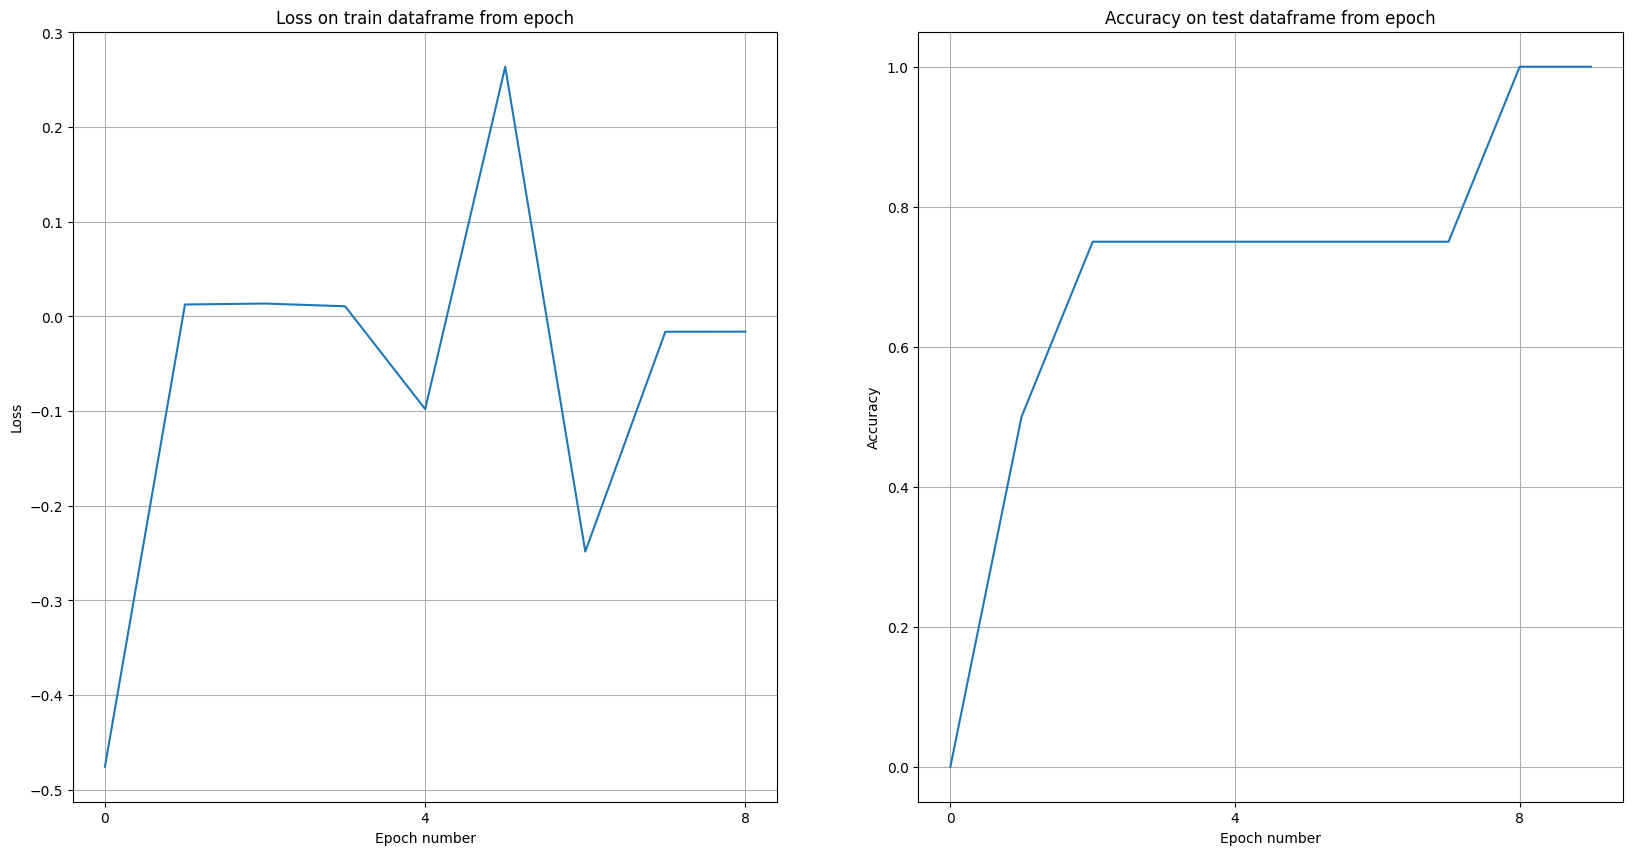

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

network = MultiLayerPerceptron(2, 10, 1)
network.randomise()

accuracy_values = [0]
loss = []
alpha = 0.9
for i in range(100000):
    error = network.train(X, y, alpha)

    if i % 10000 == 0:
        accuracy_values.append(accuracy(network, X, y))
        loss.append(error.mean())

        if accuracy_values[-1] == 1 and accuracy_values[-2] == 1:
            break

print(accuracy_values)
plot(loss, accuracy_values, "mlp_fig1")
# print(accuracy)

y_pred = np.argmax(network.forward(X), axis=1)
print(y_pred)
print(network.forward(X))
print(network.forward([1, 0]))

In [ ]:
# XOR truth table
train_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_outputs = np.array([[0], [1], [1], [0]])

# Create an instance of MultiLayerPerceptron
mlp = MultiLayerPerceptron(n_inputs=2, n_hidden=10, n_outputs=1)

# Train the MLP for a certain number of epochs
num_epochs = 10000
learning_rate = 0.1

for epoch in range(num_epochs):
    total_error = 0
    for i in range(len(train_inputs)):
        # Reshape individual samples to match the batch format
        single_input = train_inputs[i].reshape(1, -1)
        single_output = train_outputs[i].reshape(1, -1)

        error = mlp.train(single_input, single_output, learning_rate)
        total_error += np.sum(error ** 2)
    # Print or log the total error for each epoch if needed
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Total Error: {total_error}")

# Test the trained MLP
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_outputs = np.array([[0], [1], [1], [0]])

accuracy = accuracy(test_inputs, test_outputs)
print(f"Test Accuracy: {accuracy}")

print(mlp.forward(test_inputs))
